# Data Preprocessing

In [ ]:
import pandas as pd

df = pd.read_csv('https://drive.google.com/uc?id=15RfMD9lNkpS3cVN7j3_dsJKZ8_5RJG5z')
df.head()

,date,meantemp,humidity,wind_speed,meanpressure
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000


In [ ]:
import tensorflow as tf

def window_dataset(series, window_size, batch_size, shuffle_buffer):
    series = tf.expand_dims(series, axis=-1)
    ds = tf.data.Dataset.from_tensor_slices(series)
    ds = ds.window(window_size + 1, shift=1, drop_remainder=True)
    ds = ds.flat_map(lambda w: w.batch(window_size + 1))
    ds = ds.shuffle(shuffle_buffer)
    ds = ds.map(lambda w: (w[:-1], w[-1:]))
    return ds.batch(batch_size).prefetch(1)

In [ ]:
dates = df['date'].values
temp = df['meantemp'].values

In [ ]:
train_set = window_dataset(temp, window_size=2, batch_size=3, shuffle_buffer=1000)

In [ ]:
for data in train_set:
    print(data)
    break

(<tf.Tensor: shape=(3, 2, 1), dtype=float64, numpy=
array([[[23.625     ],
        [22.75      ]],

       [[31.125     ],
        [27.        ]],

       [[31.14285714],
        [30.57142857]]])>, <tf.Tensor: shape=(3, 1, 1), dtype=float64, numpy=
array([[[23.   ]],

       [[31.   ]],

       [[32.125]]])>)


# Latihan Time Series

# Univariate Time Series

In [ ]:
import numpy as np
import pandas as pd
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
import tensorflow as tf

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/ArisZxSky/datasets_dicoding/main/DailyDelhiClimateTrain.csv')
df.head()

,date,meantemp,humidity,wind_speed,meanpressure
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000


In [ ]:
df.isnull().sum()

,0
date,0
meantemp,0
humidity,0
wind_speed,0
meanpressure,0


In [ ]:
dates = df['date'].values
temp = df['meantemp'].values

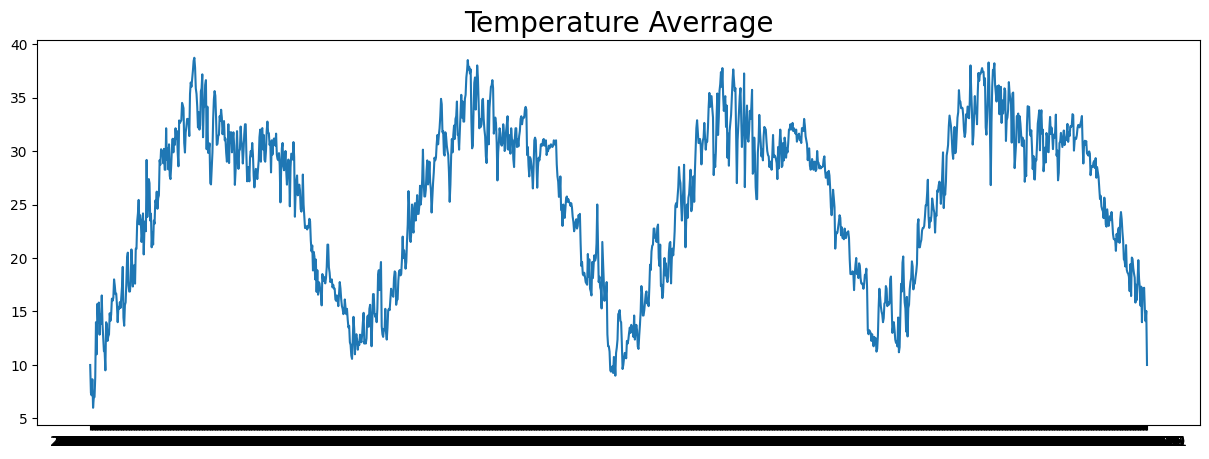

In [ ]:
plt.figure(figsize=(15,5))
plt.plot(dates,temp)
plt.title('Temperature Averrage', fontsize=20)
plt.show()

  Preprocessing

In [ ]:
def windowed_dataset(series, window_size, batch_size, shuffle_buffer):
    series = tf.expand_dims(series, axis=-1)
    ds = tf.data.Dataset.from_tensor_slices(series)
    ds = ds.window(window_size + 1, shift=1, drop_remainder=True)
    ds = ds.flat_map(lambda w: w.batch(window_size + 1))
    ds = ds.shuffle(shuffle_buffer)
    ds = ds.map(lambda w: (w[:-1], w[-1:]))
    return ds.batch(batch_size).prefetch(1)

Arsitektur Model

In [ ]:
train_set = windowed_dataset(temp, window_size=60, batch_size=100, shuffle_buffer=1000)
model = tf.keras.models.Sequential([
    tf.keras.layers.LSTM(60, return_sequences=True),
    tf.keras.layers.LSTM(60),
    tf.keras.layers.Dense(30, activation='relu'),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(1),
])

In [ ]:
optimizer = tf.keras.optimizers.SGD(learning_rate=1.0000e-04, momentum=0.9)
model.compile(loss=tf.keras.losses.Huber(),
              optimizer=optimizer,
              metrics=['mae'])
history = model.fit(train_set, epochs=100)

Epoch 1/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 5s 86ms/step - loss: 25.5005 - mae: 26.0005
Epoch 2/100


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/epoch_iterator.py:160: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 86ms/step - loss: 25.2748 - mae: 25.7748
Epoch 3/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 85ms/step - loss: 24.4990 - mae: 24.9990
Epoch 4/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 7s 448ms/step - loss: 24.0536 - mae: 24.5536
Epoch 5/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 86ms/step - loss: 23.7630 - mae: 24.2630
Epoch 6/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 86ms/step - loss: 23.6446 - mae: 24.1446
Epoch 7/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 88ms/step - loss: 23.4817 - mae: 23.9817
Epoch 8/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 86ms/step - loss: 22.4105 - mae: 22.9105
Epoch 9/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 90ms/step - loss: 21.8363 - mae: 22.3363
Epoch 10/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 86ms/step - loss: 21.0710 - mae: 21.5710
Epoch 11/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 145ms/step - loss: 20.2704 - mae: 20.7704
Epoch 12/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 4s 247ms/step - loss: 19.1110 - mae: 19.6110
Epoch 13/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 85ms/step - loss: 17.9050 - mae: 18.4050
Epoch 14/

In [ ]:
# Prediksi

forecast = history.model.predict(train_set)
forecast

15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/epoch_iterator.py:160: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


array([[30.838217],
       [31.241976],
       [32.32002 ],
       ...,
       [31.70407 ],
       [23.294674],
       [31.83781 ]], dtype=float32)

# Multivariate Time Series

In [ ]:
import pandas as pd
import tensorflow as tf

In [ ]:
df = pd.read_csv('https://drive.google.com/uc?id=1AZRfFoyekqSYpri5183RmJjciRGz_ood', sep=',',
                     infer_datetime_format=True, index_col='datetime', header=0)
df

/tmp/ipython-input-513246612.py:1: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df = pd.read_csv('https://drive.google.com/uc?id=1AZRfFoyekqSYpri5183RmJjciRGz_ood', sep=',',


,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
datetime,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0
...,...,...,...,...,...,...,...
2007-02-14 17:19:00,0.636,0.140,241.16,2.6,0.0,0.0,0.0
2007-02-14 17:20:00,0.552,0.000,240.46,2.2,0.0,0.0,0.0
2007-02-14 17:21:00,0.538,0.000,239.74,2.2,0.0,0.0,0.0


In [ ]:
def normalize_series(data, min, max):
    data = data - min
    data = data / max
    return data
data = df.values
data = normalize_series(data, data.min(axis=0), data.max(axis=0))

In [ ]:
# Hitung jumlah fitur

n_features = len(df.columns)
n_features

7

In [ ]:
split_time = int(len(data) * 0.5)
x_train = data[:split_time]
x_valid = data[split_time:]


In [ ]:
# fungsi windowed

def windowed_dataset(series, batch_size, n_past=24, n_future=24, shift=1):
    ds = tf.data.Dataset.from_tensor_slices(series)
    ds = ds.window(size=n_past + n_future, shift=shift, drop_remainder=True)
    ds = ds.flat_map(lambda w: w.batch(n_past + n_future))
    ds = ds.map(lambda w: (w[:n_past], w[n_past:]))
    return ds.batch(batch_size).prefetch(1)

In [ ]:
batch_size = 32
n_past = 24
n_future = 24
shift = 1

# Membuat windowed datasets
train_set = windowed_dataset(series=x_train, batch_size=batch_size,
                             n_past=n_past, n_future=n_future,
                             shift=shift)
valid_set = windowed_dataset(series=x_valid, batch_size=batch_size,
                             n_past=n_past, n_future=n_future,
                             shift=shift)

Arsitektur Model

In [ ]:
model = tf.keras.models.Sequential([
        tf.keras.layers.Dense(64, input_shape=(n_past, n_features)),
        tf.keras.layers.Dense(32, activation= 'relu'),
        tf.keras.layers.Dense(n_features)
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
class myCallback(tf.keras.callbacks.Callback):
        def on_epoch_end(self,epoch, logs={}):
            if (logs.get('mae') < 0.055 and logs.get('val_mae') < 0.055):
                self.model.stop_training = True

callbacks = myCallback()

Metrik evaluasi

In [ ]:
# Kode untuk melakukan menyusun struktur sesuai dengan machine learning
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
model.compile(loss='mae',
              optimizer=optimizer,
              metrics=['mae'])

In [ ]:
model.fit(train_set,
          validation_data=(valid_set),
          epochs=100,
          callbacks=callbacks,
          verbose=1)

Epoch 1/100
   1345/Unknown 12s 8ms/step - loss: 0.0866 - mae: 0.0866

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/epoch_iterator.py:160: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


1349/1349 ━━━━━━━━━━━━━━━━━━━━ 21s 15ms/step - loss: 0.0865 - mae: 0.0865 - val_loss: 0.0620 - val_mae: 0.0620
Epoch 2/100
1349/1349 ━━━━━━━━━━━━━━━━━━━━ 20s 15ms/step - loss: 0.0615 - mae: 0.0615 - val_loss: 0.0630 - val_mae: 0.0630
Epoch 3/100
1349/1349 ━━━━━━━━━━━━━━━━━━━━ 19s 14ms/step - loss: 0.0604 - mae: 0.0604 - val_loss: 0.0588 - val_mae: 0.0588
Epoch 4/100
1349/1349 ━━━━━━━━━━━━━━━━━━━━ 21s 15ms/step - loss: 0.0592 - mae: 0.0592 - val_loss: 0.0578 - val_mae: 0.0578
Epoch 5/100
1349/1349 ━━━━━━━━━━━━━━━━━━━━ 19s 14ms/step - loss: 0.0588 - mae: 0.0588 - val_loss: 0.0569 - val_mae: 0.0569
Epoch 6/100
1349/1349 ━━━━━━━━━━━━━━━━━━━━ 22s 16ms/step - loss: 0.0581 - mae: 0.0581 - val_loss: 0.0575 - val_mae: 0.0575
Epoch 7/100
1349/1349 ━━━━━━━━━━━━━━━━━━━━ 39s 29ms/step - loss: 0.0578 - mae: 0.0578 - val_loss: 0.0565 - val_mae: 0.0565
Epoch 8/100
1349/1349 ━━━━━━━━━━━━━━━━━━━━ 21s 15ms/step - loss: 0.0578 - mae: 0.0578 - val_loss: 0.0582 - val_mae: 0.0582
Epoch 9/100
1349/1349 ━━━━━━

In [ ]:
train_pred = model.predict(train_set)
train_pred[0][0]


1349/1349 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/epoch_iterator.py:160: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


array([0.39383712, 0.1955134 , 0.03017795, 0.37313604, 0.00126046,
       0.00237336, 0.8369917 ], dtype=float32)